In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [3]:
data_url = 'https://projects.fivethirtyeight.com/march-madness-api/2018/fivethirtyeight_ncaa_forecasts.csv'

ncaa = pd.read_csv(data_url,parse_dates=['forecast_date'])

ncaa.head()

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
0,mens,2018-03-31,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.644390,1,222,Villanova,97.660000,East,1
1,mens,2018-03-31,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.355610,1,130,Michigan,93.980000,West,3
2,mens,2018-03-31,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0,2350,Loyola (IL),87.270000,South,11
3,mens,2018-03-31,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0,2305,Kansas,92.370000,Midwest,1
4,mens,2018-03-31,0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0,2306,Kansas State,87.400000,South,9


In [4]:
df1 = ncaa.iloc[[0,50,10,300,500],[0,1,12,13]]
df2 = ncaa.iloc[[0,50,10,300,500,600],[0,1,9,12]]

In [5]:
df1

,gender,forecast_date,team_name,team_rating
0,mens,2018-03-31,Villanova,97.660000
50,mens,2018-03-31,New Mexico State,79.790000
10,mens,2018-03-31,Gonzaga,90.070000
300,mens,2018-03-22,Alabama,83.030000
500,mens,2018-03-16,Buffalo,83.380000


In [6]:
df2

,gender,forecast_date,rd7_win,team_name
0,mens,2018-03-31,0.644390,Villanova
50,mens,2018-03-31,0.000000,New Mexico State
10,mens,2018-03-31,0.000000,Gonzaga
300,mens,2018-03-22,0.000000,Alabama
500,mens,2018-03-16,0.003581,Buffalo
600,mens,2018-03-15,0.000000,Pennsylvania


In [8]:
#pd.concat([df1,df2])
pd.concat([df1,df2],ignore_index=True)

,forecast_date,gender,rd7_win,team_name,team_rating
0,2018-03-31,mens,nan,Villanova,97.660000
1,2018-03-31,mens,nan,New Mexico State,79.790000
2,2018-03-31,mens,nan,Gonzaga,90.070000
3,2018-03-22,mens,nan,Alabama,83.030000
4,2018-03-16,mens,nan,Buffalo,83.380000
5,2018-03-31,mens,0.644390,Villanova,nan
6,2018-03-31,mens,0.000000,New Mexico State,nan
7,2018-03-31,mens,0.000000,Gonzaga,nan
8,2018-03-22,mens,0.000000,Alabama,nan
9,2018-03-16,mens,0.003581,Buffalo,nan


In [9]:
pd.concat([df1,df2],axis=1)

,gender,forecast_date,team_name,team_rating,gender,forecast_date,rd7_win,team_name
0,mens,2018-03-31,Villanova,97.660000,mens,2018-03-31,0.644390,Villanova
10,mens,2018-03-31,Gonzaga,90.070000,mens,2018-03-31,0.000000,Gonzaga
50,mens,2018-03-31,New Mexico State,79.790000,mens,2018-03-31,0.000000,New Mexico State
300,mens,2018-03-22,Alabama,83.030000,mens,2018-03-22,0.000000,Alabama
500,mens,2018-03-16,Buffalo,83.380000,mens,2018-03-16,0.003581,Buffalo
600,NaN,NaT,NaN,nan,mens,2018-03-15,0.000000,Pennsylvania


In [10]:
pd.concat([df1,df2],axis=1,join='inner')

,gender,forecast_date,team_name,team_rating,gender,forecast_date,rd7_win,team_name
0,mens,2018-03-31,Villanova,97.660000,mens,2018-03-31,0.644390,Villanova
50,mens,2018-03-31,New Mexico State,79.790000,mens,2018-03-31,0.000000,New Mexico State
10,mens,2018-03-31,Gonzaga,90.070000,mens,2018-03-31,0.000000,Gonzaga
300,mens,2018-03-22,Alabama,83.030000,mens,2018-03-22,0.000000,Alabama
500,mens,2018-03-16,Buffalo,83.380000,mens,2018-03-16,0.003581,Buffalo


In [20]:
df3 = pd.merge(df1,df2,how='outer')

In [24]:
df3.team_name.count()
len(df3)
df3.isnull().any()

gender           False
forecast_date    False
team_name        False
team_rating       True
rd7_win          False
dtype: bool

In [25]:
#mens = ncaa[ncaa['gender']=='mens']
#womens = ncaa[ncaa['gender']=='womens']
mens = ncaa.query("gender=='mens'")
womens = ncaa.query("gender=='womens'")

In [26]:
print(ncaa.groupby('gender').team_name.count())
print(ncaa.groupby('gender').team_name.nunique())
print(mens.groupby('gender').team_name.count())
print(mens.groupby('gender').team_name.nunique())
print(womens.groupby('gender').team_name.count())
print(womens.groupby('gender').team_name.nunique())



gender
mens      816
womens    640
Name: team_name, dtype: int64
gender
mens      68
womens    64
Name: team_name, dtype: int64
gender
mens    816
Name: team_name, dtype: int64
gender
mens    68
Name: team_name, dtype: int64
gender
womens    640
Name: team_name, dtype: int64
gender
womens    64
Name: team_name, dtype: int64


In [27]:
mens_womens = pd.concat([mens,womens])

In [28]:
print(mens_womens.groupby('gender').team_name.count())
print(mens_womens.groupby('gender').team_name.nunique())


gender
mens      816
womens    640
Name: team_name, dtype: int64
gender
mens      68
womens    64
Name: team_name, dtype: int64


In [29]:
df1

,gender,forecast_date,team_name,team_rating
0,mens,2018-03-31,Villanova,97.660000
50,mens,2018-03-31,New Mexico State,79.790000
10,mens,2018-03-31,Gonzaga,90.070000
300,mens,2018-03-22,Alabama,83.030000
500,mens,2018-03-16,Buffalo,83.380000


In [30]:
df2

,gender,forecast_date,rd7_win,team_name
0,mens,2018-03-31,0.644390,Villanova
50,mens,2018-03-31,0.000000,New Mexico State
10,mens,2018-03-31,0.000000,Gonzaga
300,mens,2018-03-22,0.000000,Alabama
500,mens,2018-03-16,0.003581,Buffalo
600,mens,2018-03-15,0.000000,Pennsylvania


In [ ]:
pd.merge(df1,df2,how='outer')  #try inner, right, outer

In [32]:
pd.merge(df1,df2,left_on='forecast_date',right_on='forecast_date',how='outer') 
#be careful how you specify join as you may get results you don't want!

,gender_x,forecast_date,team_name_x,team_rating,gender_y,rd7_win,team_name_y
0,mens,2018-03-31,Villanova,97.660000,mens,0.644390,Villanova
1,mens,2018-03-31,Villanova,97.660000,mens,0.000000,New Mexico State
2,mens,2018-03-31,Villanova,97.660000,mens,0.000000,Gonzaga
3,mens,2018-03-31,New Mexico State,79.790000,mens,0.644390,Villanova
4,mens,2018-03-31,New Mexico State,79.790000,mens,0.000000,New Mexico State
5,mens,2018-03-31,New Mexico State,79.790000,mens,0.000000,Gonzaga
6,mens,2018-03-31,Gonzaga,90.070000,mens,0.644390,Villanova
7,mens,2018-03-31,Gonzaga,90.070000,mens,0.000000,New Mexico State
8,mens,2018-03-31,Gonzaga,90.070000,mens,0.000000,Gonzaga
9,mens,2018-03-22,Alabama,83.030000,mens,0.000000,Alabama


In [35]:
pd.merge(df1,df2,left_on=['team_name','gender','forecast_date'],right_on=['team_name','gender','forecast_date'],how='outer') 

,gender,forecast_date,team_name,team_rating,rd7_win
0,mens,2018-03-31,Villanova,97.660000,0.644390
1,mens,2018-03-31,New Mexico State,79.790000,0.000000
2,mens,2018-03-31,Gonzaga,90.070000,0.000000
3,mens,2018-03-22,Alabama,83.030000,0.000000
4,mens,2018-03-16,Buffalo,83.380000,0.003581
5,mens,2018-03-15,Pennsylvania,nan,0.000000


In [36]:
ndwbb = ncaa[(ncaa['team_name']=='Notre Dame') & (ncaa['gender']=='womens')]

In [37]:
ndwbb

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
817,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,1,87,Notre Dame,100.650000,Spokane,1
883,womens,2018-03-26,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.110576,0.049089,1,87,Notre Dame,99.760000,Spokane,1
947,womens,2018-03-25,0,1.000000,1.000000,1.000000,1.000000,0.438415,0.061477,0.026838,1,87,Notre Dame,99.130000,Spokane,1
1011,womens,2018-03-24,0,1.000000,1.000000,1.000000,1.000000,0.438415,0.061477,0.030781,1,87,Notre Dame,99.130000,Spokane,1
1075,womens,2018-03-23,0,1.000000,1.000000,1.000000,0.849906,0.408303,0.057749,0.029840,1,87,Notre Dame,99.610000,Spokane,1
1140,womens,2018-03-19,0,1.000000,1.000000,1.000000,0.849906,0.408303,0.057749,0.027106,1,87,Notre Dame,99.610000,Spokane,1
1204,womens,2018-03-18,0,1.000000,1.000000,1.000000,0.849906,0.417951,0.053503,0.024956,1,87,Notre Dame,99.610000,Spokane,1
1268,womens,2018-03-17,0,1.000000,1.000000,0.963166,0.779681,0.403301,0.050623,0.023575,1,87,Notre Dame,99.440000,Spokane,1
1332,womens,2018-03-16,0,1.000000,1.000000,0.963166,0.779681,0.408276,0.073697,0.034490,1,87,Notre Dame,99.440000,Spokane,1
1395,womens,2018-03-12,0,1.000000,0.998779,0.961039,0.822747,0.495545,0.106628,0.055858,1,87,Notre Dame,101.010000,Spokane,1


In [38]:
ndwbb1 = ndwbb.query("forecast_date=='2018-03-30'")
ndwbb_roster = pd.read_csv('./data/ndwbb_roster.csv')

In [39]:
ndwbb1

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
817,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,1,87,Notre Dame,100.650000,Spokane,1


In [40]:
ndwbb_roster['team'] = 'Notre Dame'

In [41]:
ndwbb_roster

,Number,Name,Height,Position,Class,Hometown,State,High School,team
0,20,"Benz, Nicole",68,Guard,FR,Valencia,CA,William S. Hart,Notre Dame
1,40,"Butler, Maureen",73,Forward,JR,Livonia,MIC,Dearborn Divine Child,Notre Dame
2,2,"Cole, Kaitlin",70,Guard,SO,Toledo,OH,Sylvania Northview,Notre Dame
3,14,"Johnson, Mychal",67,Guard,SR,Huntington,WV,Huntington St. Joseph,Notre Dame
4,3,"Mabrey, Marina",71,Guard,JR,Belmar,NJ,Manasquan,Notre Dame
5,21,"Nelson, Kristina",76,Forward,GS,Buford,GA,Buford,Notre Dame
6,24,"Ogunbowale, Arike",68,Guard,JR,Milwaukee,WI,Divine Savior Holy Angels,Notre Dame
7,32,"Patterson, Danielle",74,Forward,FR,Brooklyn,NY,The Mary Louis Academy,Notre Dame
8,23,"Shepard, Jessica",76,Forward,JR,Fremont,NB,Fremont,Notre Dame
9,1,"Thompson, Lili",67,Guard,GS,Mansfield,TX,Timberview,Notre Dame


In [42]:
pd.merge(ndwbb1,ndwbb_roster,left_on='team_name',right_on='team',how='left')

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,...,team_seed,Number,Name,Height,Position,Class,Hometown,State,High School,team
0,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,20,"Benz, Nicole",68,Guard,FR,Valencia,CA,William S. Hart,Notre Dame
1,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,40,"Butler, Maureen",73,Forward,JR,Livonia,MIC,Dearborn Divine Child,Notre Dame
2,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,2,"Cole, Kaitlin",70,Guard,SO,Toledo,OH,Sylvania Northview,Notre Dame
3,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,14,"Johnson, Mychal",67,Guard,SR,Huntington,WV,Huntington St. Joseph,Notre Dame
4,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,3,"Mabrey, Marina",71,Guard,JR,Belmar,NJ,Manasquan,Notre Dame
5,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,21,"Nelson, Kristina",76,Forward,GS,Buford,GA,Buford,Notre Dame
6,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,24,"Ogunbowale, Arike",68,Guard,JR,Milwaukee,WI,Divine Savior Holy Angels,Notre Dame
7,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,32,"Patterson, Danielle",74,Forward,FR,Brooklyn,NY,The Mary Louis Academy,Notre Dame
8,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,23,"Shepard, Jessica",76,Forward,JR,Fremont,NB,Fremont,Notre Dame
9,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,...,1,1,"Thompson, Lili",67,Guard,GS,Mansfield,TX,Timberview,Notre Dame


In [ ]:
pd.merge(ndwbb,ndwbb_roster,left_on='team_name',right_on='team')

In [43]:
print(ndwbb.rd1_win.mean())
print(ndwbb.rd2_win.mean())
print(ndwbb.rd3_win.mean())
print(ndwbb.rd4_win.mean())
print(ndwbb.rd5_win.mean())
print(ndwbb.rd6_win.mean())
print(ndwbb.rd7_win.mean())
print(ndwbb.team_rating.mean())

1.0
0.9998778807288
0.9887372045194001
0.8931827316492
0.5418509155094999
0.1633481216234
0.07534748811869998
99.739


In [44]:
ndwbb.agg({'rd1_win':'mean','rd2_win':'mean','rd3_win':'mean','rd4_win':'mean','rd5_win':'mean'
          ,'rd6_win':'mean','rd7_win':'mean','team_rating':'mean'})

rd1_win        1.000000
rd2_win        0.999878
rd3_win        0.988737
rd4_win        0.893183
rd5_win        0.541851
rd6_win        0.163348
rd7_win        0.075347
team_rating   99.739000
dtype: float64

In [45]:
ndwbb.agg({'rd1_win':'max','rd2_win':'max','rd3_win':'max','rd4_win':'max','rd5_win':'max'
          ,'rd6_win':'max','rd7_win':'max','team_rating':'max'})

rd1_win         1.000000
rd2_win         1.000000
rd3_win         1.000000
rd4_win         1.000000
rd5_win         1.000000
rd6_win         1.000000
rd7_win         0.450942
team_rating   101.010000
dtype: float64

In [46]:
ndwbb.describe()

,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_rating
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.000000,1.000000,0.999878,0.988737,0.893183,0.541851,0.163348,0.075347,1.000000,87.000000,99.739000
std,0.000000,0.000000,0.000386,0.018144,0.095443,0.242991,0.294742,0.132400,0.000000,0.000000,0.616107
min,0.000000,1.000000,0.998779,0.961039,0.779681,0.403301,0.050623,0.023575,1.000000,87.000000,99.130000
25%,0.000000,1.000000,1.000000,0.972375,0.829537,0.408303,0.057749,0.026905,1.000000,87.000000,99.440000
50%,0.000000,1.000000,1.000000,1.000000,0.849906,0.428183,0.061477,0.030310,1.000000,87.000000,99.610000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.481262,0.098395,0.045439,1.000000,87.000000,99.722500
max,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,1.000000,87.000000,101.010000


In [47]:
ndwbb.describe(include='all')

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
count,10,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10,10.000000,10,10
unique,1,10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,1,1
top,womens,2018-03-19 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Notre Dame,nan,Spokane,1
freq,10,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10,nan,10,10
first,NaN,2018-03-12 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN
last,NaN,2018-03-30 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN
mean,NaN,NaN,0.000000,1.000000,0.999878,0.988737,0.893183,0.541851,0.163348,0.075347,1.000000,87.000000,NaN,99.739000,NaN,NaN
std,NaN,NaN,0.000000,0.000000,0.000386,0.018144,0.095443,0.242991,0.294742,0.132400,0.000000,0.000000,NaN,0.616107,NaN,NaN
min,NaN,NaN,0.000000,1.000000,0.998779,0.961039,0.779681,0.403301,0.050623,0.023575,1.000000,87.000000,NaN,99.130000,NaN,NaN
25%,NaN,NaN,0.000000,1.000000,1.000000,0.972375,0.829537,0.408303,0.057749,0.026905,1.000000,87.000000,NaN,99.440000,NaN,NaN


In [48]:
ndwbb['forecast_date'].count()

10

In [49]:
ndwbb['forecast_date'].agg(['min','max','count'])

min      2018-03-12 00:00:00
max      2018-03-30 00:00:00
count                     10
Name: forecast_date, dtype: object

In [ ]:
ndwbb.count(axis=1)

In [ ]:
ncaa.head(1)

In [50]:
gender_group = ncaa.groupby('gender')

In [51]:
gender_group

In [52]:
gender_group.groups

{'mens': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             806, 807, 808, 809, 810, 811, 812, 813, 814, 815],
            dtype='int64', length=816),
 'womens': Int64Index([ 816,  817,  818,  819,  820,  821,  822,  823,  824,  825,
             ...
             1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455],
            dtype='int64', length=640)}

In [53]:
gender_group.agg({'forecast_date':'count','team_name':'nunique','team_rating':'mean'}
                ).rename(columns={'forecast_date':'count of dates','team_name':'unique teams','team_rating':'avg rating'})

,count of dates,unique teams,avg rating
gender,,,
mens,816,68,82.662561
womens,640,64,84.287031


In [55]:
ncaa_agg = ncaa.groupby(['gender','team_name']).agg({'forecast_date':'count','team_rating':'mean','rd7_win':'max'}).reset_index()
ncaa_agg.sort_values(['gender','team_rating'],ascending=[False,False])[:15]
#ncaa_agg

,gender,team_name,forecast_date,team_rating,rd7_win
78,womens,Connecticut,10,114.438000,0.764739
71,womens,Baylor,10,105.362000,0.119744
103,womens,Mississippi State,10,102.260000,0.549058
95,womens,Louisville,10,100.689000,0.129466
110,womens,Notre Dame,10,99.739000,0.450942
114,womens,Oregon,10,98.579000,0.019088
126,womens,Texas,10,98.164000,0.014556
111,womens,Ohio State,10,95.098000,0.007033
120,womens,South Carolina,10,94.795000,0.008300
128,womens,UCLA,10,94.508000,0.004918


In [56]:
ncaa.team_rating.agg(['min','max','median','mean'])

min       60.580000
max      115.600000
median    83.430000
mean      83.376614
Name: team_rating, dtype: float64

In [57]:
#gender_group.groups
gender_group_sub = ncaa.iloc[[0,10,80,816,822,1400],[0,1,9,12]].groupby('gender')


In [58]:
for name, rows in gender_group_sub:
    print("group: " + name, rows,sep='\n')

group: mens
   gender forecast_date  rd7_win  team_name
0    mens    2018-03-31 0.644390  Villanova
10   mens    2018-03-31 0.000000    Gonzaga
80   mens    2018-03-25 0.000000    Clemson
group: womens
      gender forecast_date  rd7_win          team_name
816   womens    2018-03-30 0.549058  Mississippi State
822   womens    2018-03-30 0.000000       Oregon State
1400  womens    2018-03-12 0.005384         Ohio State


In [ ]:
womens.rd7_win.describe()

In [59]:
#filter out women's teams that are below mean for rd7_win

def rd7_filter(group):
    if group['rd7_win'].mean() > 0.015:
        return True
    else:
        return False
    

In [60]:
womens_grp = womens[['gender','team_name','rd7_win','team_rating']].groupby('team_name')

In [61]:
womens_grp_filtered = womens_grp.filter(rd7_filter)

In [62]:
womens_grp_filtered.query("team_name=='Baylor'")

,gender,team_name,rd7_win,team_rating
829,womens,Baylor,0.000000,105.350000
893,womens,Baylor,0.000000,105.350000
957,womens,Baylor,0.000000,105.350000
1021,womens,Baylor,0.000000,105.350000
1085,womens,Baylor,0.000000,105.350000
1137,womens,Baylor,0.097495,105.350000
1201,womens,Baylor,0.090561,105.350000
1265,womens,Baylor,0.088262,105.440000
1329,womens,Baylor,0.119744,105.440000
1393,womens,Baylor,0.118917,105.290000


In [63]:
womens_grp_filtered.groupby('team_name')['rd7_win'].mean()

team_name
Baylor              0.051498
Connecticut         0.658488
Louisville          0.063160
Mississippi State   0.122148
Notre Dame          0.075347
Name: rd7_win, dtype: float64

In [65]:
#transform
def rating_center(series):
    return series - series.mean()



In [66]:
womens_grp_center_rating = womens_grp['team_rating'].transform(rating_center)

In [67]:
womens_grp_center_rating[0:10]

816    0.770000
817    0.911000
818    0.362000
819    1.501000
820   -0.275000
821    0.051000
822    1.186000
823    0.282000
824    0.796000
825    1.504000
Name: team_rating, dtype: float64

In [68]:
womens['centered rating']=womens_grp_center_rating

C:\Users\pmille17\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
print(womens.query("team_name=='Notre Dame'")['team_rating'].mean())
womens.query("team_name=='Notre Dame'")

99.739


,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed,centered rating
817,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.450942,1,87,Notre Dame,100.650000,Spokane,1,0.911000
883,womens,2018-03-26,0,1.000000,1.000000,1.000000,1.000000,1.000000,0.110576,0.049089,1,87,Notre Dame,99.760000,Spokane,1,0.021000
947,womens,2018-03-25,0,1.000000,1.000000,1.000000,1.000000,0.438415,0.061477,0.026838,1,87,Notre Dame,99.130000,Spokane,1,-0.609000
1011,womens,2018-03-24,0,1.000000,1.000000,1.000000,1.000000,0.438415,0.061477,0.030781,1,87,Notre Dame,99.130000,Spokane,1,-0.609000
1075,womens,2018-03-23,0,1.000000,1.000000,1.000000,0.849906,0.408303,0.057749,0.029840,1,87,Notre Dame,99.610000,Spokane,1,-0.129000
1140,womens,2018-03-19,0,1.000000,1.000000,1.000000,0.849906,0.408303,0.057749,0.027106,1,87,Notre Dame,99.610000,Spokane,1,-0.129000
1204,womens,2018-03-18,0,1.000000,1.000000,1.000000,0.849906,0.417951,0.053503,0.024956,1,87,Notre Dame,99.610000,Spokane,1,-0.129000
1268,womens,2018-03-17,0,1.000000,1.000000,0.963166,0.779681,0.403301,0.050623,0.023575,1,87,Notre Dame,99.440000,Spokane,1,-0.299000
1332,womens,2018-03-16,0,1.000000,1.000000,0.963166,0.779681,0.408276,0.073697,0.034490,1,87,Notre Dame,99.440000,Spokane,1,-0.299000
1395,womens,2018-03-12,0,1.000000,0.998779,0.961039,0.822747,0.495545,0.106628,0.055858,1,87,Notre Dame,101.010000,Spokane,1,1.271000


In [70]:
#apply
gender_group.apply(lambda x: x['team_name'].value_counts())[0:10]

gender                           
mens    Florida State                12
        Seton Hall                   12
        Michigan State               12
        Michigan                     12
        Duke                         12
        Texas A&M                    12
        Providence                   12
        Ohio State                   12
        Xavier                       12
        North Carolina-Greensboro    12
Name: team_name, dtype: int64

In [71]:
def center_ratingdf(x):
    x['team_rating_centered'] = x['team_rating'] - x['team_rating'].mean()
    return x

In [ ]:
#for name, row in womens_grp:
#    print(name, row, sep='\n')

In [72]:
womens_grp2 = womens_grp.apply(center_ratingdf)
womens_grp2_g = womens_grp2.groupby('team_name')

In [73]:
def rating_mean(x):
    x['team_rating_mean']=x['team_rating'].mean()
    return x


In [74]:
womens_group_check = womens_grp2_g.apply(rating_mean)

In [75]:
womens_group_check['check'] = womens_group_check['team_rating'] - womens_group_check['team_rating_mean']

In [76]:
womens_group_check[0:15]

,gender,team_name,rd7_win,team_rating,team_rating_centered,team_rating_mean,check
816,womens,Mississippi State,0.549058,103.030000,0.770000,102.260000,0.770000
817,womens,Notre Dame,0.450942,100.650000,0.911000,99.739000,0.911000
818,womens,Connecticut,0.000000,114.800000,0.362000,114.438000,0.362000
819,womens,Louisville,0.000000,102.190000,1.501000,100.689000,1.501000
820,womens,South Carolina,0.000000,94.520000,-0.275000,94.795000,-0.275000
821,womens,Oregon,0.000000,98.630000,0.051000,98.579000,0.051000
822,womens,Oregon State,0.000000,93.970000,1.186000,92.784000,1.186000
823,womens,UCLA,0.000000,94.790000,0.282000,94.508000,0.282000
824,womens,Duke,0.000000,91.230000,0.796000,90.434000,0.796000
825,womens,Buffalo,0.000000,86.020000,1.504000,84.516000,1.504000


In [78]:
womens.head(1)

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed,centered rating
816,womens,2018-03-30,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.549058,1,344,Mississippi State,103.030000,Kansas City,1,0.770000


In [77]:
womens['team_name'].map(lambda x : x.upper())[0:5]

816    MISSISSIPPI STATE
817           NOTRE DAME
818          CONNECTICUT
819           LOUISVILLE
820       SOUTH CAROLINA
Name: team_name, dtype: object

In [79]:
womens[['team_name']].apply(lambda x : x.str.upper())[0:5]

,team_name
816,MISSISSIPPI STATE
817,NOTRE DAME
818,CONNECTICUT
819,LOUISVILLE
820,SOUTH CAROLINA


In [80]:
womens['team_name'].map(lambda x : x.replace('State','St'))[0:5]

816    Mississippi St
817        Notre Dame
818       Connecticut
819        Louisville
820    South Carolina
Name: team_name, dtype: object

In [81]:
womens.head(1)
womens_sub = womens[womens['team_name'].isin(['Mississippi State','Notre Dame','Connecticut','South Carolina'])][['gender','forecast_date','rd7_win','team_name','team_rating']]
womens_sub.sort_values(['team_name','forecast_date'])

,gender,forecast_date,rd7_win,team_name,team_rating
1392,womens,2018-03-12,0.654797,Connecticut,112.830000
1328,womens,2018-03-16,0.675476,Connecticut,112.830000
1264,womens,2018-03-17,0.762888,Connecticut,115.600000
1200,womens,2018-03-18,0.758471,Connecticut,115.600000
1136,womens,2018-03-19,0.743779,Connecticut,114.920000
1072,womens,2018-03-23,0.764739,Connecticut,114.920000
1008,womens,2018-03-24,0.749945,Connecticut,114.040000
944,womens,2018-03-25,0.723364,Connecticut,114.040000
880,womens,2018-03-26,0.751423,Connecticut,114.800000
818,womens,2018-03-30,0.000000,Connecticut,114.800000


In [82]:
womens_sub.pivot_table(index=['team_name'],aggfunc={'team_rating':'mean','rd7_win':'max'})

,rd7_win,team_rating
team_name,,
Connecticut,0.764739,114.438000
Mississippi State,0.549058,102.260000
Notre Dame,0.450942,99.739000
South Carolina,0.008300,94.795000


In [83]:
ncaa_sub = ncaa[ncaa['team_name'].isin(['Mississippi State','Notre Dame','Connecticut','South Carolina','Michigan','Villanova'])][['gender','forecast_date','rd7_win','team_name','team_rating']]
ncaa_sub.sort_values(['team_name','forecast_date'])

,gender,forecast_date,rd7_win,team_name,team_rating
1392,womens,2018-03-12,0.654797,Connecticut,112.830000
1328,womens,2018-03-16,0.675476,Connecticut,112.830000
1264,womens,2018-03-17,0.762888,Connecticut,115.600000
1200,womens,2018-03-18,0.758471,Connecticut,115.600000
1136,womens,2018-03-19,0.743779,Connecticut,114.920000
1072,womens,2018-03-23,0.764739,Connecticut,114.920000
1008,womens,2018-03-24,0.749945,Connecticut,114.040000
944,womens,2018-03-25,0.723364,Connecticut,114.040000
880,womens,2018-03-26,0.751423,Connecticut,114.800000
818,womens,2018-03-30,0.000000,Connecticut,114.800000


In [86]:
ncaa_sub.pivot_table(index='team_name',columns='gender',aggfunc={'team_rating':'mean','rd7_win':'max'}).fillna(0)

rd7_win          team_rating           
gender                mens   womens        mens     womens
team_name                                                 
Connecticut       0.000000 0.764739    0.000000 114.438000
Michigan          0.355610 0.000052   90.225000  87.130000
Mississippi State 0.000000 0.549058    0.000000 102.260000
Notre Dame        0.000000 0.450942    0.000000  99.739000
South Carolina    0.000000 0.008300    0.000000  94.795000
Villanova         0.644390 0.000004   95.595833  82.061000

In [87]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
ndwbb = womens.query("team_name == 'Notre Dame'")

In [89]:
import datetime as dt

In [90]:
ndwbb.forecast_date.dt.year

817     2018
883     2018
947     2018
1011    2018
1075    2018
1140    2018
1204    2018
1268    2018
1332    2018
1395    2018
Name: forecast_date, dtype: int64

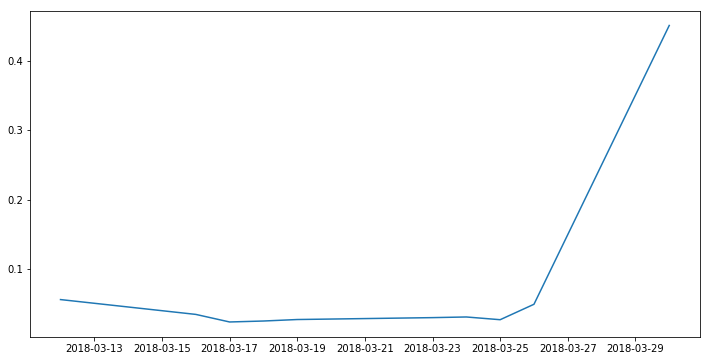

In [91]:
figure, axes = plt.subplots(figsize=(12,6))

axes.plot(ndwbb['forecast_date'],ndwbb['rd7_win'])

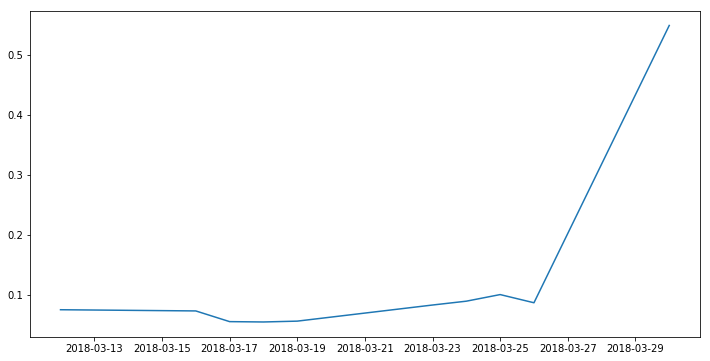

In [92]:
figure, axes = plt.subplots(figsize=(12,6))

msstate = womens.query("team_name=='Mississippi State'")

axes.plot(msstate['forecast_date'],msstate['rd7_win'])

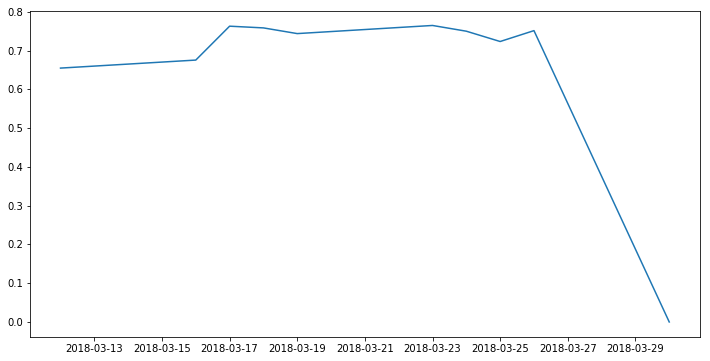

In [93]:
figure, axes = plt.subplots(figsize=(12,6))

msstate = womens.query("team_name=='Connecticut'")

axes.plot(msstate['forecast_date'],msstate['rd7_win'])

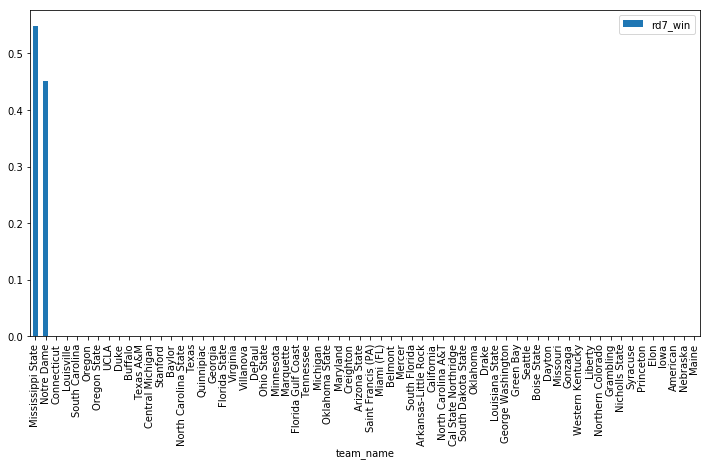

In [95]:
womens[womens['forecast_date']=='2018-03-30'].plot('team_name','rd7_win',kind='bar',figsize=(12,6))